***

# Example Notebook -- Example plots 

***

In this example notebook we are going to plot the root mean square fluctuation
([RMSF](https://en.wikipedia.org/wiki/Mean_squared_displacement)) obtained from 
an MD simulation. We are going to correlate the RMSF with the with the secondary 
structure.

_**Note:** This notebook uses the [pandas module](https://pandas.pydata.org) for
simplicity. Please, make sure pandas is installed._

## Preparations

### Loading modules and data to plot

First, let's load the neccessary modules and data to plot. The file `Q9X078_rmsf.csv` 
already contains Secondary structure annotations. 

For obtaining obtaining secondary structure information, tools like 
[DSSP](http://bioinformatica.isa.cnr.it/SUSAN/NAR2/dsspweb.html) or 
[STRIDE](https://webclu.bio.wzw.tum.de/stride/) can be used. 
Also [PyMOL](https://pymol.org/2/) can provide secondary structure 
annotations by selecting your whole protein and running the following command 
in the PyMOL command line:

```shell
# Iterate over Calpha and print secondary structure annotations
iterate sele and n. CA, print(ss or "L", end="")
```

In [1]:
import sys
sys.path.append('../src')

from secstructartist import SecStructArtist, draw_secondary_structure
import matplotlib.pyplot as plt
import pandas as pd

# Load RMSF data: 1st column - residue indices, 2nd column -RMSF values
df = pd.read_csv('Q9X078_rmsf.csv')
df.head()

,seqIndex,seqLabel,seqRes,RMSF,pLDDT,ssLabel,dsspLabel
0,1,M,MET,1.592,41.68,L,
1,2,A,ALA,0.911,52.20,L,
2,3,K,LYS,0.872,65.39,L,S
3,4,Y,TYR,0.587,77.59,L,S
4,5,Q,GLN,0.556,82.11,L,


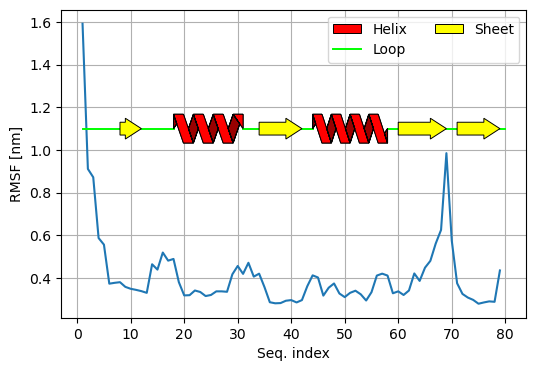

In [2]:
fig, ax = plt.subplots(figsize=(6,4), subplot_kw={
    'projection': 'secstruct'
})

# Main axis
ax.plot(df['seqIndex'], df['RMSF'])
ax.grid()
ax.draw_secondary_structure(
    df['ssLabel'], x=1, y=1.1, height=.15, artist='pymol'
)
ax.set_ylabel('RMSF [nm]')
ax.set_xlabel('Seq. index')
ax.legend(ncols=2)

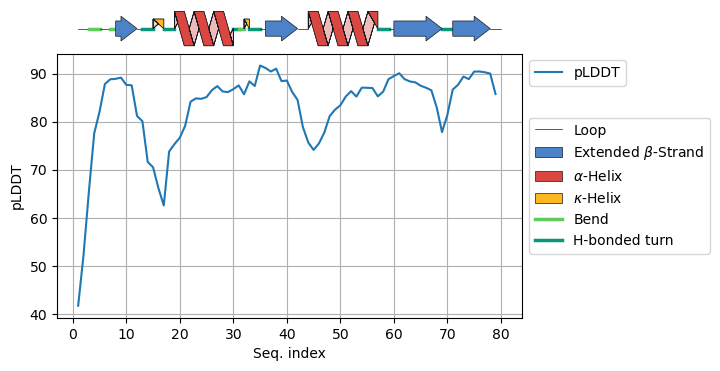

In [3]:
fig, axs = plt.subplots(
    2,1, figsize=(6,4), sharex=True, 
    subplot_kw = {'projection': 'secstruct'},
    gridspec_kw={'height_ratios': [1, 7], 'hspace': .04}
)

# Main axis
ax = axs[1]
ax.grid()
ax.plot(df['seqIndex'], df['pLDDT'], label='pLDDT')
ax.set_ylabel('pLDDT')
ax.set_xlabel('Seq. index')
ax.legend(loc='upper left', bbox_to_anchor=(1., 1.),)

# Secondary structure axis
ax = axs[0]
ax.axes.set_axis_off()
ax.draw_secondary_structure(
    df['dsspLabel'], x=1, height=.15, artist='stride'
)
ax.legend(
    loc='center left', bbox_to_anchor=(1., .5),
    bbox_transform=axs[1].transAxes # Center-left on main axis
)

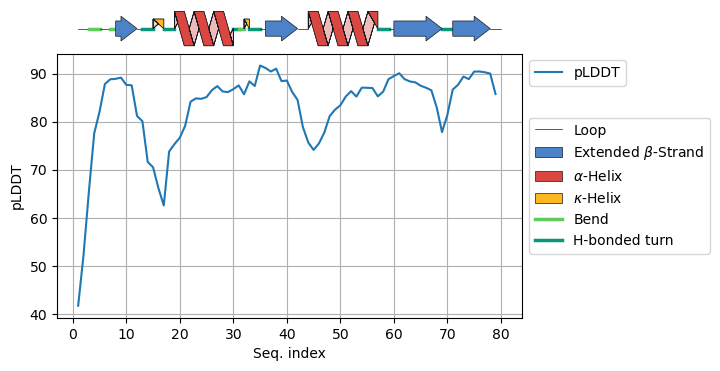

In [4]:
fig, axs = plt.subplots(
    2,1, figsize=(6,4), sharex=True, 
    subplot_kw = {'projection': 'secstruct'},
    gridspec_kw={'height_ratios': [1, 7], 'hspace': .04}
)

# Main axis
ax = axs[1]
ax.grid()
ax.plot(df['seqIndex'], df['pLDDT'], label='pLDDT')
ax.set_ylabel('pLDDT')
ax.set_xlabel('Seq. index')
ax.legend(loc='upper left', bbox_to_anchor=(1., 1.),)

# Secondary structure axis
ax = axs[0]
ax.axes.set_axis_off()
ax.draw_secondary_structure(
    df['dsspLabel'], x=1, height=.15, artist='stride'
)
ax.legend(
    loc='center left', bbox_to_anchor=(1., .5),
    bbox_transform=axs[1].transAxes # Center-left on main axis
)